# Assessing model accuracy: Train/test split
----   


## Getting started
Same as before, we will need to import a few Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

**Next** we will load our data as a Pandas DataFrames. In this case, we will be using data from multiple files.   

First, we will load some data on the Rand exchange rates over time.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/James-Leslie/Learning-Library/master/ML%20for%20Actuaries/1_Linear_Regression/data/data_1.csv', index_col=0)
df.head(10)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


## Train/Test Splitting

When fitting a machine learning model to some data, the ultimate purpose is usually to develop something which we can use on other data. We will introduce here the concept of splitting data into two sets - one for training, and a second for testing.   
   
We will fit a model using the training data, and then assess its accuracy using the test set.   
   
**Let's start** by splitting our data into two sets. We will use 80% of the data for training and keep 20% aside for testing.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
y = df['ZAR/USD']
X = df.drop('ZAR/USD', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=50)

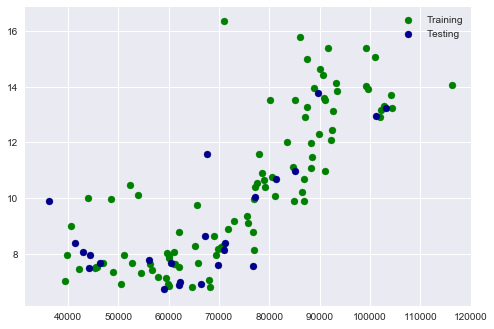

In [6]:
# plot the results
plt.scatter(X_train, y_train, color='green', label='Training')  # plot the training data
plt.scatter(X_test, y_test, color='darkblue', label='Testing')  # plot the testing data
plt.legend()
plt.show()

## Let's train our linear model   

We'll fit our model the same as before, except this time, we will only expose it to our training data.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()

In [9]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
b = float(lm.intercept_)

In [11]:
a = lm.coef_

In [12]:
print("Slope:\t\t", a)
print("Intercept:\t", float(b))

Slope:		 [ 0.0001199]
Intercept:	 1.4542630444144784


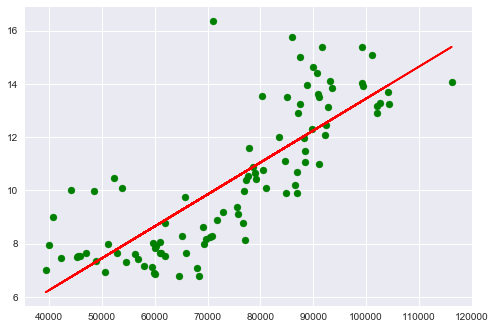

In [13]:
# generate values of y from x, using the linear model
gen_y = lm.predict(X_train)

# plot the results
plt.scatter(X_train, y_train, color='green')  # plot the training data
plt.plot(X_train, gen_y, color='red')  # plot the line connecting the generated y-values
plt.show()

Now, let's assess the fit of the line to the training data using `sklearn.metrics`

In [14]:
from sklearn import metrics

In [15]:
print("Training:")
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 2.61254753756
R_squared: 0.640229309505


# Testing the model on unseen data

To see how well our model does on new data, we'll now use the testing set.

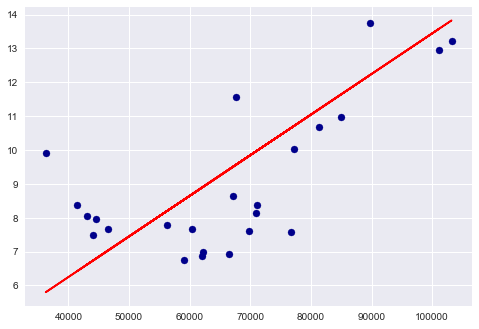

In [16]:
# generate values of y from x, using the linear model
gen_y_test = lm.predict(X_test)

# plot the results
plt.scatter(X_test, y_test, color='darkblue')  # plot the testing data
plt.plot(X_test, gen_y_test, color='red')  # plot the line connecting the generated y-values
plt.show()

And now let's assess the fit of the line on the unsees testing data.

In [17]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 3.0389819776
R_squared: 0.300310434126


We can see from the results above that the model performs worse on the testing set than on the training set. This concept of a machine learning model fitting training data well, but failing to predict unseen data is known as **overfitting**.   

Perhaps we need to look at ways to improve our model so as to avoid overfitting. 

----
**To summarise:**   
We learnt how to:
* split a dataset into training and testing subsets.   
* calculate model parameters using the training set.   
* assess the accuracy of our model using the testing set.   

In future tutorials, we will look at methods for improving the predictive accuracy of our model.